# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [23]:
import pandas as pd

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('germany.csv', sep=";", header=0)

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())
print(df.dtypes)

# erase any non-used data in the DataFrame
df = df.drop(df.columns[0:7], axis=1)
print()
print(df.head())
print(df.dtypes)



Number of samples: 65
Number of features: 13
Example data:
   birth  year       age 1. Sektor 2. Sektor 3. Sektor  other  Age  \
0   1868  1882  under 15   292123    142385     89650       0   14   
1   1865  1882  15 to 19  1506900   1109178    743565       0   17   
2   1857  1882  20 to 29  1832509   1756024   1524714       0   25   
3   1847  1882  30 to 39  1332373   1385875    735845       0   35   
4   1837  1882  40 to 49  1297735    978199    570898       0   45   

   year_of_birth  year_of_census  1. Sector  2. Sector  3. Sector  
0           1868            1882       55.7       27.2       17.1  
1           1865            1882       44.9       33.0       22.1  
2           1857            1882       35.8       34.3       29.8  
3           1847            1882       38.6       40.1       21.3  
4           1837            1882       45.6       34.4       20.1  
birth               int64
year                int64
age                object
1. Sektor          object
2. Sekto

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [24]:
# I need data for each individual year, not just for the cohorts. 
# Therefore, the missing data needs to be inferred. 
# This should be done using TensorFlow.


In [25]:
# Handling missing values:
# I will use TensorFlow for the interpolation of the missing data - in a separate program.
# My code for handling missing will follow.


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


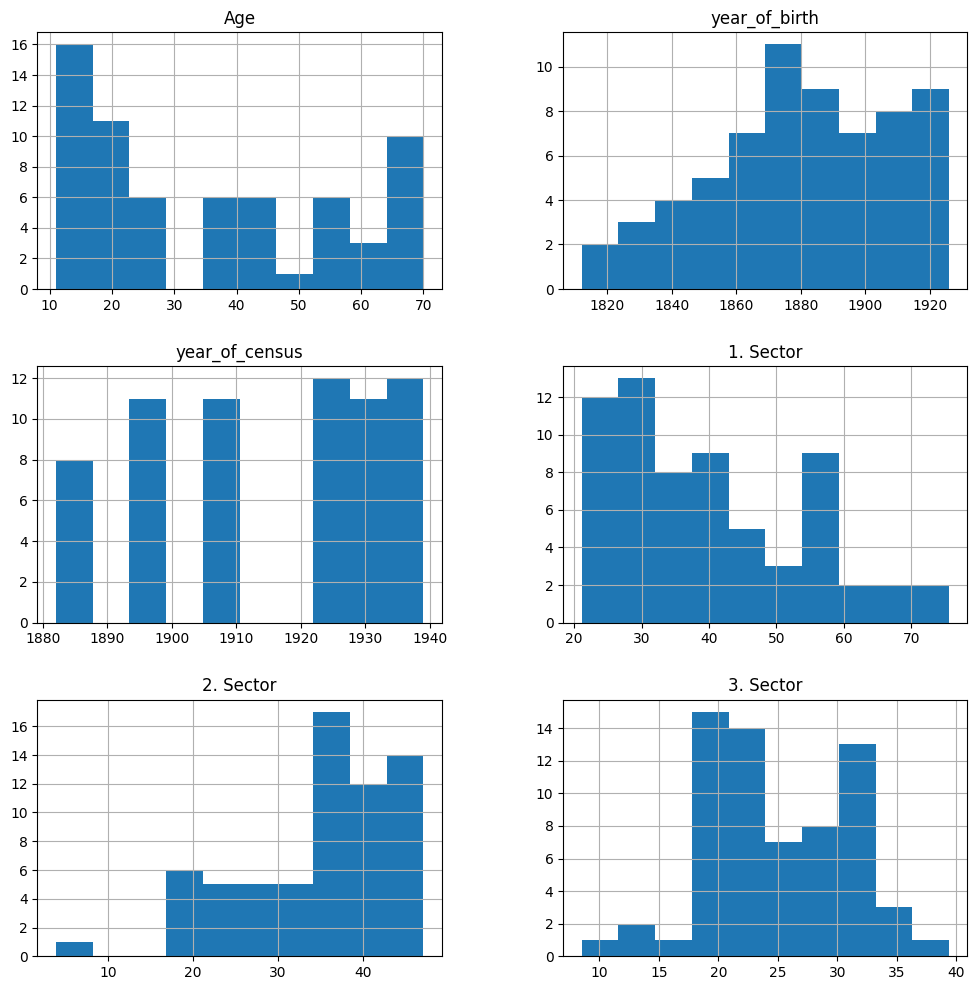

In [26]:
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12))
plt.show()


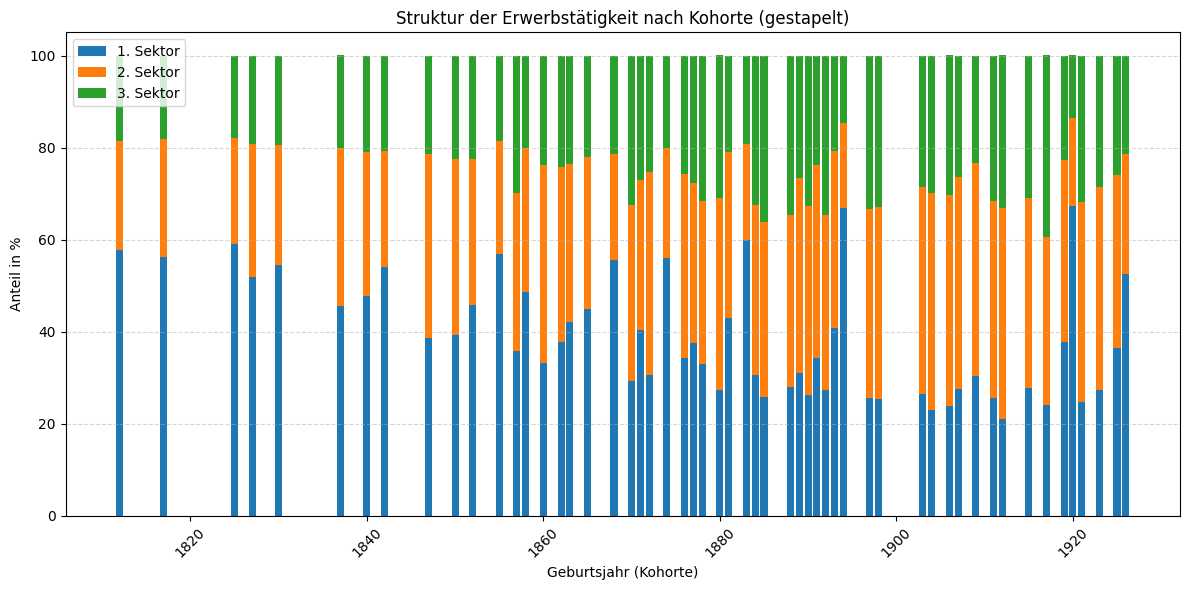

In [27]:
# Better visualization of the data

# only the sectors
sectors = df[["1. Sector", "2. Sector", "3. Sector"]]
x_labels = df["year_of_birth"]

# Gestapeltes Balkendiagramm
plt.figure(figsize=(12, 6))
plt.bar(x_labels, sectors["1. Sector"], label="1. Sektor")
plt.bar(x_labels, sectors["2. Sector"], bottom=sectors["1. Sector"], label="2. Sektor")
plt.bar(x_labels, sectors["3. Sector"], bottom=sectors["1. Sector"] + sectors["2. Sector"], label="3. Sektor")

plt.xlabel("Geburtsjahr (Kohorte)")
plt.ylabel("Anteil in %")
plt.title("Struktur der Erwerbstätigkeit nach Kohorte (gestapelt)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


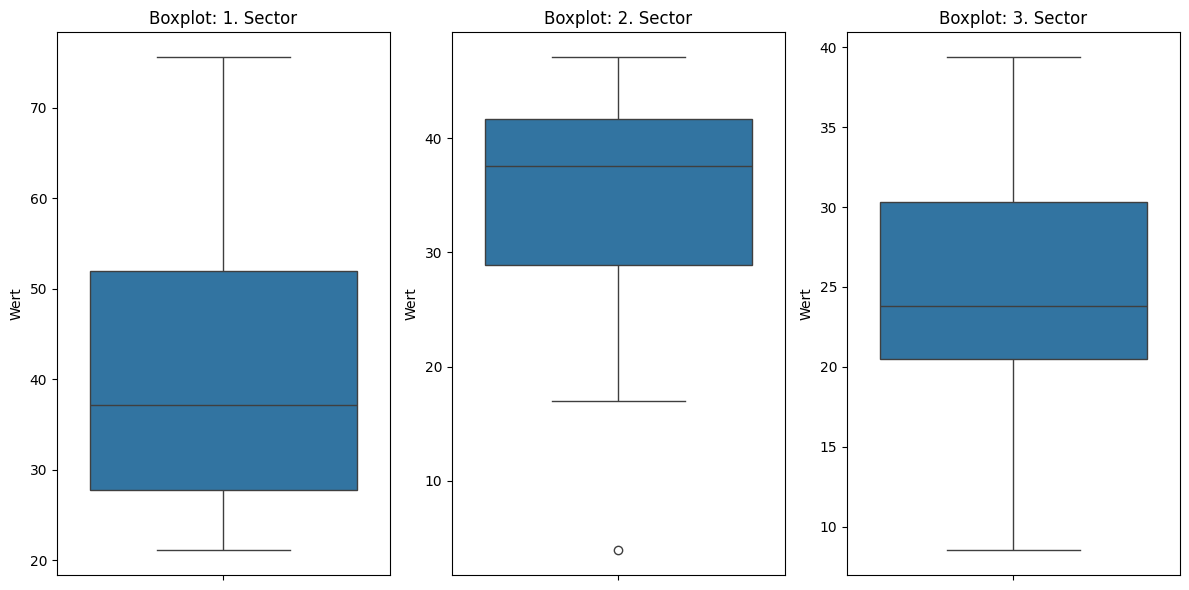

In [30]:
# Numerische Spalten extrahieren
numerical_cols = ["1. Sector", "2. Sector", "3. Sector"]

# Boxplots zur Erkennung von Ausreißern
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot: {col}")
    plt.ylabel("Wert")

plt.tight_layout()
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [28]:
# There is no bias. I have historical data.

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


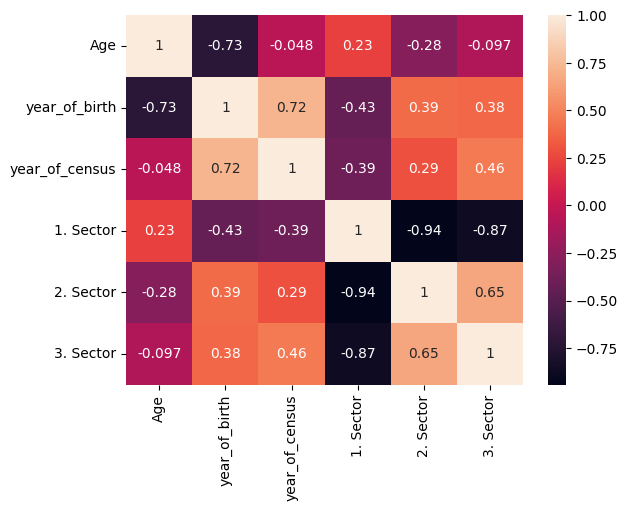

In [29]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


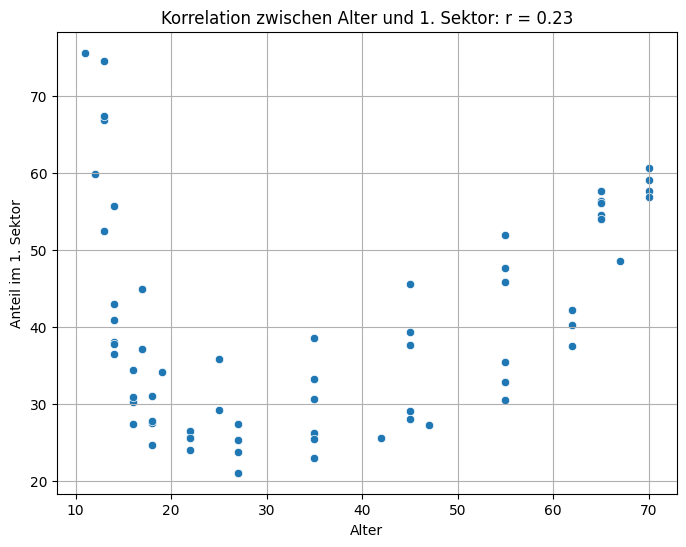

np.float64(0.22718913005327876)

In [31]:
# Korrelation zwischen Alter und Anteil im 1. Sektor
correlation = df["Age"].corr(df["1. Sector"])

# Streudiagramm zur Visualisierung
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="1. Sector", data=df)
plt.title(f"Korrelation zwischen Alter und 1. Sektor: r = {correlation:.2f}")
plt.xlabel("Alter")
plt.ylabel("Anteil im 1. Sektor")
plt.grid(True)
plt.show()

correlation
